In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [44]:
%cd /content/gdrive/MyDrive/Data/Various/

/content/gdrive/MyDrive/Data/Various


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Test').getOrCreate()

In [104]:
spark

In [101]:
url = pd.read_csv('urls.csv')['url'][0]

names = ['SalesOrderNumber', 'SalesOrderLineItem', 'OrderDate', 'CustomerName', 'EmailAddress', 'Item', 'Quantity', 'UnitPrice', 'TaxAmount']

sales = pd.read_csv(url, sep=',', names=names)
sales.head()

,SalesOrderNumber,SalesOrderLineItem,OrderDate,CustomerName,EmailAddress,Item,Quantity,UnitPrice,TaxAmount
0,SO43701,1,2019-07-01,Christy Zhu,christy12@adventure-works.com,"Mountain-100 Silver, 44",1,3399.9900,271.9992
1,SO43704,1,2019-07-01,Julio Ruiz,julio1@adventure-works.com,"Mountain-100 Black, 48",1,3374.9900,269.9992
2,SO43705,1,2019-07-01,Curtis Lu,curtis9@adventure-works.com,"Mountain-100 Silver, 38",1,3399.9900,271.9992
3,SO43700,1,2019-07-01,Ruben Prasad,ruben10@adventure-works.com,"Road-650 Black, 62",1,699.0982,55.9279
4,SO43703,1,2019-07-01,Albert Alvarez,albert7@adventure-works.com,"Road-150 Red, 62",1,3578.2700,286.2616


[git workflow](https://gist.github.com/ernielikesapple/3ebd182612bdcb3c8e1d49f6dc62bb3f)

In [108]:
sales['Day'] = pd.to_datetime(sales['OrderDate']).dt.day
sales.head()

,SalesOrderNumber,SalesOrderLineItem,OrderDate,CustomerName,EmailAddress,Item,Quantity,UnitPrice,TaxAmount,Date,Day
0,SO43701,1,2019-07-01,Christy Zhu,christy12@adventure-works.com,"Mountain-100 Silver, 44",1,3399.9900,271.9992,2019-07-01,1
1,SO43704,1,2019-07-01,Julio Ruiz,julio1@adventure-works.com,"Mountain-100 Black, 48",1,3374.9900,269.9992,2019-07-01,1
2,SO43705,1,2019-07-01,Curtis Lu,curtis9@adventure-works.com,"Mountain-100 Silver, 38",1,3399.9900,271.9992,2019-07-01,1
3,SO43700,1,2019-07-01,Ruben Prasad,ruben10@adventure-works.com,"Road-650 Black, 62",1,699.0982,55.9279,2019-07-01,1
4,SO43703,1,2019-07-01,Albert Alvarez,albert7@adventure-works.com,"Road-150 Red, 62",1,3578.2700,286.2616,2019-07-01,1


In [112]:
sales['Month'] = pd.to_datetime(sales['OrderDate']).dt.month
sales.head()

,SalesOrderNumber,SalesOrderLineItem,OrderDate,CustomerName,EmailAddress,Item,Quantity,UnitPrice,TaxAmount,Date,Day,Month
0,SO43701,1,2019-07-01,Christy Zhu,christy12@adventure-works.com,"Mountain-100 Silver, 44",1,3399.9900,271.9992,2019-07-01,1,7
1,SO43704,1,2019-07-01,Julio Ruiz,julio1@adventure-works.com,"Mountain-100 Black, 48",1,3374.9900,269.9992,2019-07-01,1,7
2,SO43705,1,2019-07-01,Curtis Lu,curtis9@adventure-works.com,"Mountain-100 Silver, 38",1,3399.9900,271.9992,2019-07-01,1,7
3,SO43700,1,2019-07-01,Ruben Prasad,ruben10@adventure-works.com,"Road-650 Black, 62",1,699.0982,55.9279,2019-07-01,1,7
4,SO43703,1,2019-07-01,Albert Alvarez,albert7@adventure-works.com,"Road-150 Red, 62",1,3578.2700,286.2616,2019-07-01,1,7


In [129]:
sales_ri = sales.groupby(['Month','Day'])['TaxAmount'].sum().reset_index()

sales_ri.head()

,Month,Day,TaxAmount
0,7,1,2272.7087
1,7,2,1773.4975
2,7,3,2346.0207
3,7,4,1256.9022
4,7,5,2517.3048


In [134]:
daily_monthly_flights = sales_ri.pivot("Day", "Month", "TaxAmount")

daily_monthly_flights.head()

Month,7,8,9,10,11,12
Day,,,,,,
1,2272.7087,1975.3064,900.4503,1658.5200,2043.4967,954.3782
2,1773.4975,1668.7824,842.5224,858.7848,2832.0912,1145.0464
3,2346.0207,1145.0464,1145.0464,1114.5216,1186.7119,2243.3056
4,1256.9022,2862.6160,572.5232,1472.9735,1685.0448,1417.0456
5,2517.3048,914.7127,2014.9719,1759.2351,1431.3080,628.4511


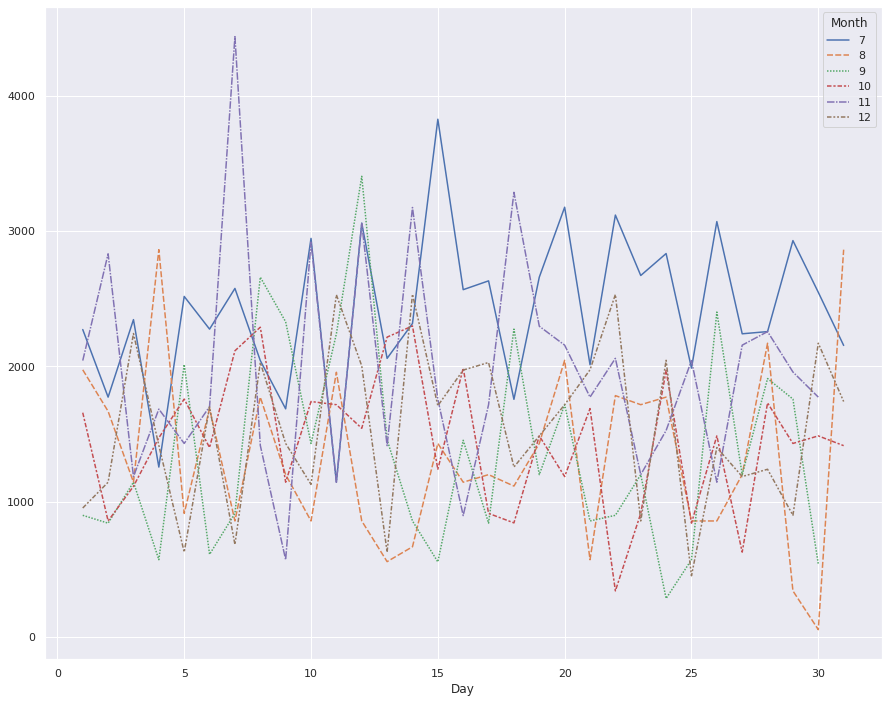

In [146]:
##sns.set(rc={"figure.figsize":(20, 15)})
plt.figure(figsize=(15, 12))

sns.set_theme(style="darkgrid")

sns.lineplot(data=daily_monthly_flights)

plt.show()